In [3]:
# Import manipulation libraries
import random
import pandas as pd
import numpy as np

# Data visualization libraries
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv('purchase_data.csv')

In [5]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01/12/2010 08:26       2.55     17850.0  United Kingdom  
1  01/12/2010 08:26       3.39     17850.0  United Kingdom  
2  01/12/2010 08:26       2.75     17850.0  United Kingdom  
3  01/12/2010 08:26       3.39     17850.0  United Kingdom  
4  01/12/2010 08:26       3.39     17850.0  United Kingdom

In [6]:
# print the shape of the dataset
print("Shape of the dataset")
print("-"*30)
print(df.shape)

Shape of the dataset
------------------------------
(541909, 8)


In [7]:
# print some info about the dataset
print("Info about the dataset")
print("-"*30)
print(df.info())

Info about the dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [8]:
# Check for missing values in the dataset
print("Missing Values")
print("-"*30)
print(df.isnull().sum())

Missing Values
------------------------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Check for duplicates in the dataset
print("Data duplication")
print("-"*30)
print(df.duplicated(keep=False).sum())

Data duplication
------------------------------
10147


In [10]:
# Check the unique values in the dataset
print("Unique Values")
print("-"*30)
print(df.nunique())

Unique Values
------------------------------
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [11]:
# calculate and print the percenatage of missing values in customerID column
CustomerID_missing_percentage = df['CustomerID'].isnull().sum() / df.shape[0] * 100
print("Percentage of CustomerID missing Values")
CustomerID_missing_percentage.round()

Percentage of CustomerID missing Values


25.0

<font size = "5"> Data Cleaning </font>

In [13]:
# Display rows with missing values in the 'Description' column
rows_with_missing_description = df[df['Description'].isnull()]
print("Rows with missing 'Description':")
rows_with_missing_description

Rows with missing 'Description':


InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  01/12/2010 11:52        0.0   
1970      536545     21134         NaN         1  01/12/2010 14:32        0.0   
1971      536546     22145         NaN         1  01/12/2010 14:33        0.0   
1972      536547     37509         NaN         1  01/12/2010 14:33        0.0   
1987      536549    85226A         NaN         1  01/12/2010 14:34        0.0   
...          ...       ...         ...       ...               ...        ...   
535322    581199     84581         NaN        -2  07/12/2011 18:26        0.0   
535326    581203     23406         NaN        15  07/12/2011 18:31        0.0   
535332    581209     21620         NaN         6  07/12/2011 18:35        0.0   
536981    581234     72817         NaN        27  08/12/2011 10:33        0.0   
538554    581408     85175         NaN        20  08/12/2011 14:06        0.0   

        CustomerID         Country  
622            NaN  United Kingdom  
1970           NaN  United Kingdom  
1971           NaN  United Kingdom  
1972           NaN  United Kingdom  
1987           NaN  United Kingdom  
...            ...             ...  
535322         NaN  United Kingdom  
535326         NaN  United Kingdom  
535332         NaN  United Kingdom  
536981         NaN  United Kingdom  
538554         NaN  United Kingdom  

[1454 rows x 8 columns]

We can see that the rows with missing Descriptions have also a missing customerID, another issue is that the UnitPrice is 0.0 which is incorrect.

In [15]:
# Display rows with missing values in 'Description' and 'CustomerID', and where 'UnitPrice' is 0.0
rows_with_missing_and_zero_price = df[df['Description'].isnull() & df['CustomerID'].isnull() & (df['UnitPrice'] == 0.0)]
print("Rows with missing in 'Description' and 'CustomerID' and with 'UnitPrice' = 0.0:")
rows_with_missing_and_zero_price

Rows with missing in 'Description' and 'CustomerID' and with 'UnitPrice' = 0.0:


InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  01/12/2010 11:52        0.0   
1970      536545     21134         NaN         1  01/12/2010 14:32        0.0   
1971      536546     22145         NaN         1  01/12/2010 14:33        0.0   
1972      536547     37509         NaN         1  01/12/2010 14:33        0.0   
1987      536549    85226A         NaN         1  01/12/2010 14:34        0.0   
...          ...       ...         ...       ...               ...        ...   
535322    581199     84581         NaN        -2  07/12/2011 18:26        0.0   
535326    581203     23406         NaN        15  07/12/2011 18:31        0.0   
535332    581209     21620         NaN         6  07/12/2011 18:35        0.0   
536981    581234     72817         NaN        27  08/12/2011 10:33        0.0   
538554    581408     85175         NaN        20  08/12/2011 14:06        0.0   

        CustomerID         Country  
622            NaN  United Kingdom  
1970           NaN  United Kingdom  
1971           NaN  United Kingdom  
1972           NaN  United Kingdom  
1987           NaN  United Kingdom  
...            ...             ...  
535322         NaN  United Kingdom  
535326         NaN  United Kingdom  
535332         NaN  United Kingdom  
536981         NaN  United Kingdom  
538554         NaN  United Kingdom  

[1454 rows x 8 columns]

Now we made sure of our theory. All of those 1454 rows are invalid and should be dropped.

In [17]:
# drop rows with missing values
df = df.dropna()

In [18]:
# Check for missing values in the dataset
print("Missing Values")
print("-"*30)
print(df.isnull().sum())

Missing Values
------------------------------
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [19]:
# Check for duplicates in the dataset
print("Data duplication")
print("-"*30)
print(df.duplicated(keep=False).sum())

Data duplication
------------------------------
10062


In [20]:
# Drop duplicate rows
df = df.drop_duplicates()

In [21]:
# Check for duplicates in the dataset
print("Data duplication")
print("-"*30)
print(df.duplicated(keep=False).sum())

Data duplication
------------------------------
0


In [22]:
# Check Description of Numerical values
print("Data Description")
print("-"*30)
df.describe()

Data Description
------------------------------


Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000

We can see 2 issues:

UnitPrice has 0 as the min value. That cannot be right.
Quantity has negative values. That also cannot be right.

In [24]:
# Count occurrences where 'UnitPrice' column is equal to 0.0
zero_unit_price_count = (df['UnitPrice'] == 0.0).sum()
print("Number of occurrences where UnitPrice is 0.0:", zero_unit_price_count)

Number of occurrences where UnitPrice is 0.0: 40


In [25]:
# Drop those 40 columns
df = df[df.UnitPrice != 0.0]

I also noticed that when the InvoiceNo starts with 'C", the quantity value is in negative.

In [27]:
# Identify canceled orders based on 'InvoiceNo' starting with 'C' and negative 'Quantity'
canceled_orders = df[df['InvoiceNo'].str.startswith('C') & (df['Quantity'] < 0)]

# Print the first few rows of canceled orders
print("Canceled Orders:")
canceled_orders

Canceled Orders:


InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

             InvoiceDate  UnitPrice  CustomerID         Country  
141     01/12/2010 09:41      27.50     14527.0  United Kingdom  
154     01/12/2010 09:49       4.65     15311.0  United Kingdom  
235     01/12/2010 10:24       1.65     17548.0  United Kingdom  
236     01/12/2010 10:24       0.29     17548.0  United Kingdom  
237     01/12/2010 10:24       0.29     17548.0  United Kingdom  
...                  ...        ...         ...             ...  
540449  09/12/2011 09:57       0.83     14397.0  United Kingdom  
541541  09/12/2011 10:28     224.69     15498.0  United Kingdom  
541715  09/12/2011 11:57      10.95     15311.0  United Kingdom  
541716  09/12/2011 11:58       1.25     17315.0  United Kingdom  
541717  09/12/2011 11:58       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [28]:
# Drop cancelled orders
df = df[df['Quantity'] > 0 ]

In [29]:
# print some info about the dataset
print("Info about the dataset")
print("-"*30)
print(df.info())

Info about the dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB
None


We can correct date datatype

In [31]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True) # Changed to format= mixed Because its noted that they are not in same format
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce') # to debug coerce invalid dates to NaT
# Convert CustomerID and InvoiceNo to integers
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

In [32]:
# print some info about the dataset
print("Info about the dataset")
print("-"*30)
print(df.info())

Info about the dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int32         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 24.0+ MB
None


In [33]:
# Check Description of Numerical values
print("Data Description")
print("-"*30)
df.describe()

Data Description
------------------------------


InvoiceNo       Quantity                    InvoiceDate  \
count  392692.000000  392692.000000                         392692   
mean   560590.875047      13.119702  2011-07-10 19:13:07.771892480   
min    536365.000000       1.000000            2010-12-01 08:26:00   
25%    549234.000000       2.000000            2011-04-07 11:12:00   
50%    561874.000000       6.000000            2011-07-31 12:02:00   
75%    572061.000000      12.000000            2011-10-20 12:53:00   
max    581587.000000   80995.000000            2011-12-09 12:50:00   
std     13087.063759     180.492832                            NaN   

           UnitPrice     CustomerID  
count  392692.000000  392692.000000  
mean        3.125914   15287.843865  
min         0.001000   12346.000000  
25%         1.250000   13955.000000  
50%         1.950000   15150.000000  
75%         3.750000   16791.000000  
max      8142.750000   18287.000000  
std        22.241836    1713.539549

As some StockCodes are reffering to different descriptions of the same items, let's make sure to only have one description per stockcode.

In [35]:
# Create a dictionary mapping StockCode to Description in the original dataset
stockcode_to_description_dict = df.groupby('StockCode')['Description'].apply(lambda x: x.value_counts().idxmax()).to_dict()

# Group by StockCode and choose the most common description
duplicate_stockcodes = df[df.duplicated(subset=['StockCode'], keep=False)]
stockcode_to_description = duplicate_stockcodes.groupby('StockCode')['Description'].apply(lambda x: x.value_counts().idxmax())
df['Description'] = df['StockCode'].map(stockcode_to_description_dict)

<font size = "10">Data Exploration</font>

Time Period of the data

In [38]:
# Display the start, end, and period of the InvoiceDate
start_date = df.InvoiceDate.min()
#start_datetime = start_date.strftime('%d %b %Y %H:%M')
end_date = df.InvoiceDate.max()
#end_datetime = start_date.strftime('%d %b %Y %H:%M')
period = end_date - start_date

print("Start:", start_date)
print("End:", end_date)
print("Period:", period)

Start: 2010-12-01 08:26:00
End: 2011-12-09 12:50:00
Period: 373 days 04:24:00


The data contains transactions history of a little over a year

Number of Countries

In [41]:
# Print total number of unique countries
print("Total number of Countries:\n" + str(df["Country"].nunique()))

Total number of Countries:
37


In [42]:
#exploring the unique values of each attribute
print("Total Number of transactions: ", df['InvoiceNo'].nunique())
print("Total Number of products bought: ", df['StockCode'].nunique())
print("Total Number of customers:", df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )


Total Number of transactions:  18532
Total Number of products bought:  3665
Total Number of customers: 4338
Percentage of customers NA:  0.0 %


In [43]:
# Create revenue column 
df["Revenue"] = df["UnitPrice"] * df["Quantity"]
df.sample(10)

InvoiceNo StockCode                        Description  Quantity  \
367491     568895     23322        LARGE WHITE HEART OF WICKER         3   
799        536464     22297          HEART IVORY TRELLIS SMALL         1   
453955     575502     23209           LUNCH BAG VINTAGE DOILY         10   
461314     575935     21875                   KINGS CHOICE MUG        24   
90776      544068     20677                 PINK POLKADOT BOWL         1   
155372     549985     22904          CALENDAR PAPER CUT DESIGN         6   
393169     570806     22757       LARGE RED BABUSHKA NOTEBOOK         12   
6685       536975     22910  PAPER CHAIN KIT VINTAGE CHRISTMAS         6   
225941     556768     48194                     DOORMAT HEARTS         1   
267987     560368    84971S          SMALL HEART FLOWERS HOOK          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
367491 2011-09-29 13:11:00       2.95       15356  United Kingdom     8.85  
799    2010-12-01 12:23:00       1.25       17968  United Kingdom     1.25  
453955 2011-11-10 10:10:00       1.65       16700  United Kingdom    16.50  
461314 2011-11-13 11:20:00       1.25       17838  United Kingdom    30.00  
90776  2011-02-15 14:08:00       1.25       16431  United Kingdom     1.25  
155372 2011-04-13 15:58:00       2.95       15640  United Kingdom    17.70  
393169 2011-10-12 12:42:00       1.25       13115  United Kingdom    15.00  
6685   2010-12-03 14:04:00       2.95       14911            EIRE    17.70  
225941 2011-06-14 12:21:00       7.95       17243  United Kingdom     7.95  
267987 2011-07-18 12:25:00       0.85       17841  United Kingdom     2.55


 Total Revenue Countries:
           Country      Revenue
35  United Kingdom  7285024.644
23     Netherlands   285446.340
10            EIRE   265262.460
14         Germany   228678.400
13          France   208934.310


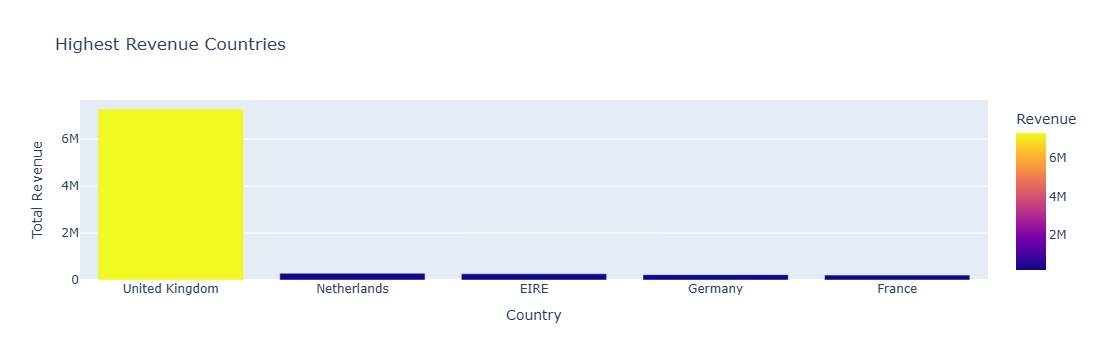

In [44]:
# Group by country and calculate total revenue
highest_revenue_countries = df.groupby(['Country'])['Revenue'].sum().reset_index()
highest_revenue_countries = highest_revenue_countries.sort_values(by=["Revenue"], ascending=False )
print("\n Total Revenue Countries:")
print(highest_revenue_countries.head())
# Plotly bar plot
fig = px.bar(highest_revenue_countries.head(5), x='Country', y='Revenue', color='Revenue', title="Highest Revenue Countries")
fig.update_xaxes(title="Country")
fig.update_yaxes(title="Total Revenue")
fig.show()



Top 5 Countries by Revenue and Percentage Contribution:
United Kingdom: £7285024.64 (81.97%)
Netherlands: £285446.34 (3.21%)
EIRE: £265262.46 (2.98%)
Germany: £228678.40 (2.57%)
France: £208934.31 (2.35%)


C:\Users\samueloyewunmi_ysj\AppData\Local\Temp\3\ipykernel_5496\3552036922.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




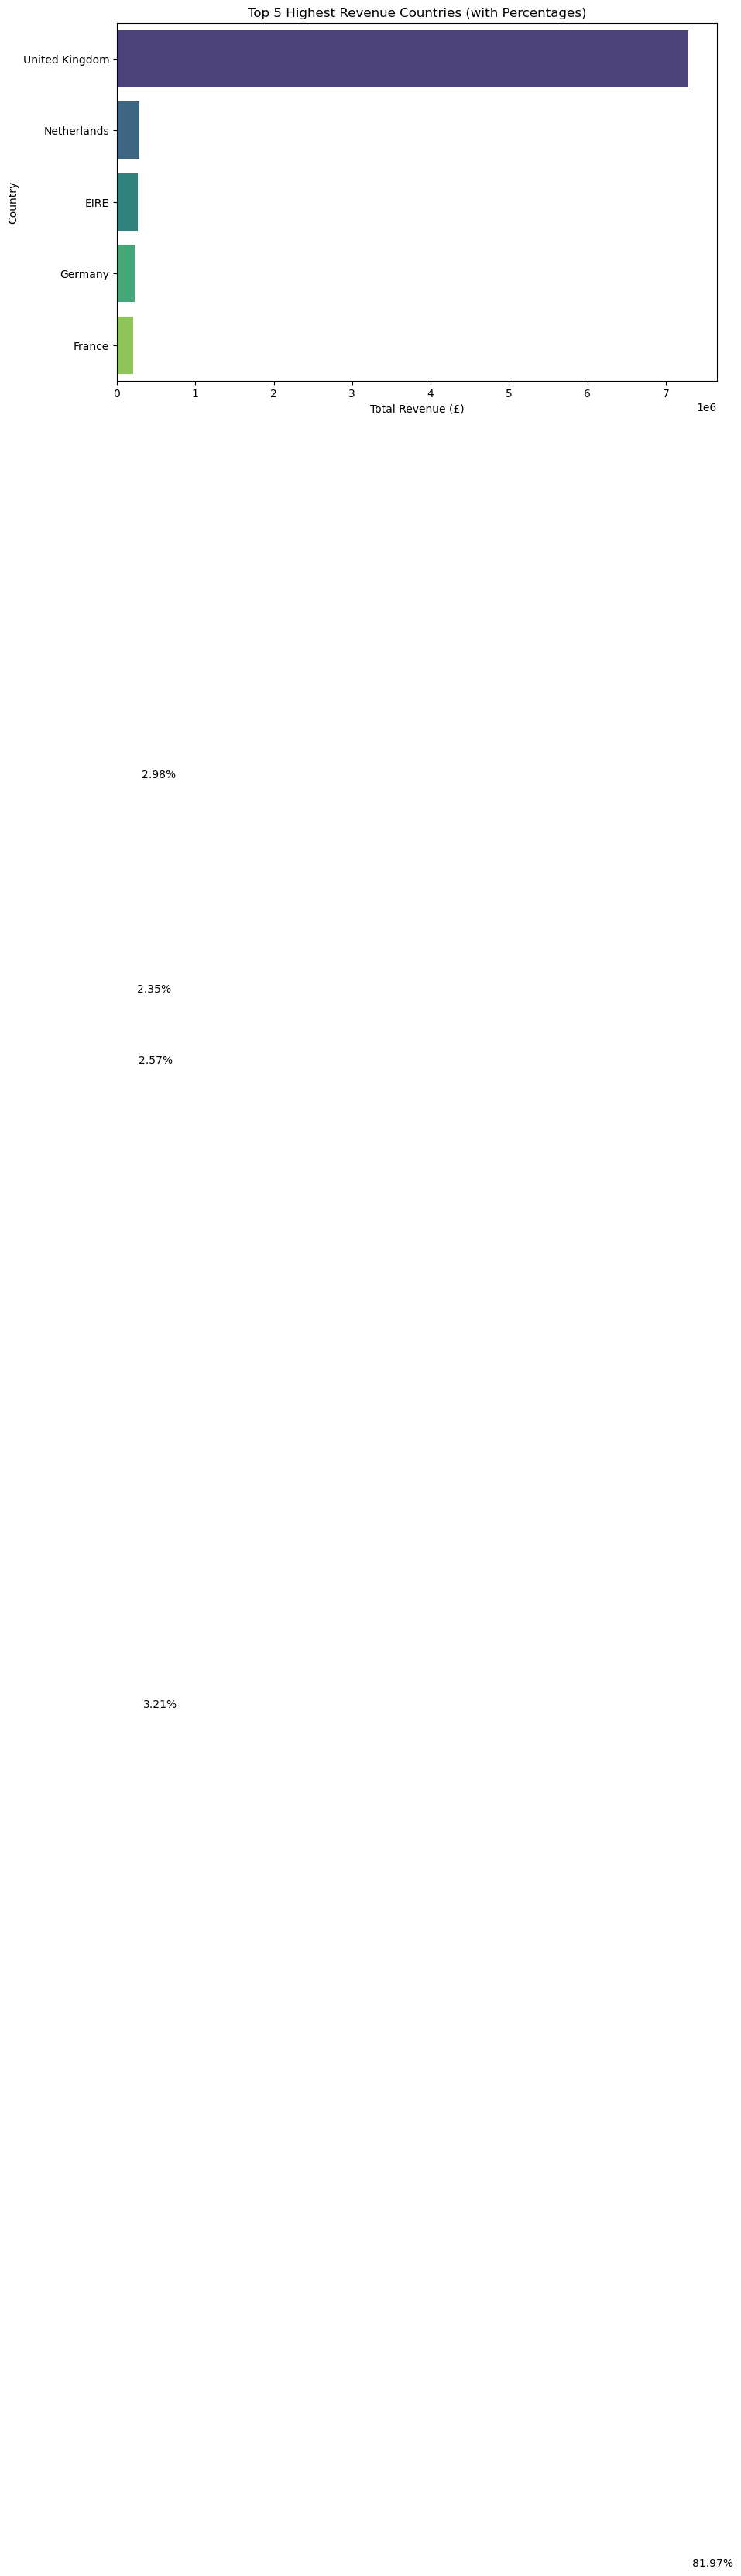

In [45]:
# Group by 'Country' and calculate the sum of revenue
highest_revenue_countries = df.groupby(['Country'])['Revenue'].sum().reset_index()

# Calculate the percentage of total revenue for each country
total_revenue = highest_revenue_countries['Revenue'].sum()
highest_revenue_countries['Revenue_Percentage'] = (highest_revenue_countries['Revenue'] / total_revenue) * 100

# Sort the countries by revenue in descending order
highest_revenue_countries = highest_revenue_countries.sort_values(by=["Revenue"], ascending=False)

# Display the top countries by revenue with percentages
print("\nTop 5 Countries by Revenue and Percentage Contribution:")
top_5_countries = highest_revenue_countries.head(5)
for index, row in top_5_countries.iterrows():
    print(f"{row['Country']}: £{row['Revenue']:.2f} ({row['Revenue_Percentage']:.2f}%)")

# Seaborn bar plot for the top 5 revenue-generating countries
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Revenue', 
    y='Country', 
    data=highest_revenue_countries.head(5), 
    palette='viridis'
)

# Annotate percentages on the bars
for index, row in highest_revenue_countries.head(5).iterrows():
    plt.text(
        row['Revenue'] + 50000,  # Adjust position to avoid overlap
        index, 
        f"{row['Revenue_Percentage']:.2f}%", 
        color='black', 
        ha="left", 
        va="center"
    )

# Title and labels
plt.title("Top 5 Highest Revenue Countries (with Percentages)")
plt.xlabel("Total Revenue (£)")
plt.ylabel("Country")
plt.show()

Number of Products

In [84]:
# Print total number of unique products
print("Total number of Products:\n" + str(df["StockCode"].nunique()))

Total number of Products:
3665


<font size = "10"> Question 1: Monthly fluctuations in total revenue and number of transactions</font>

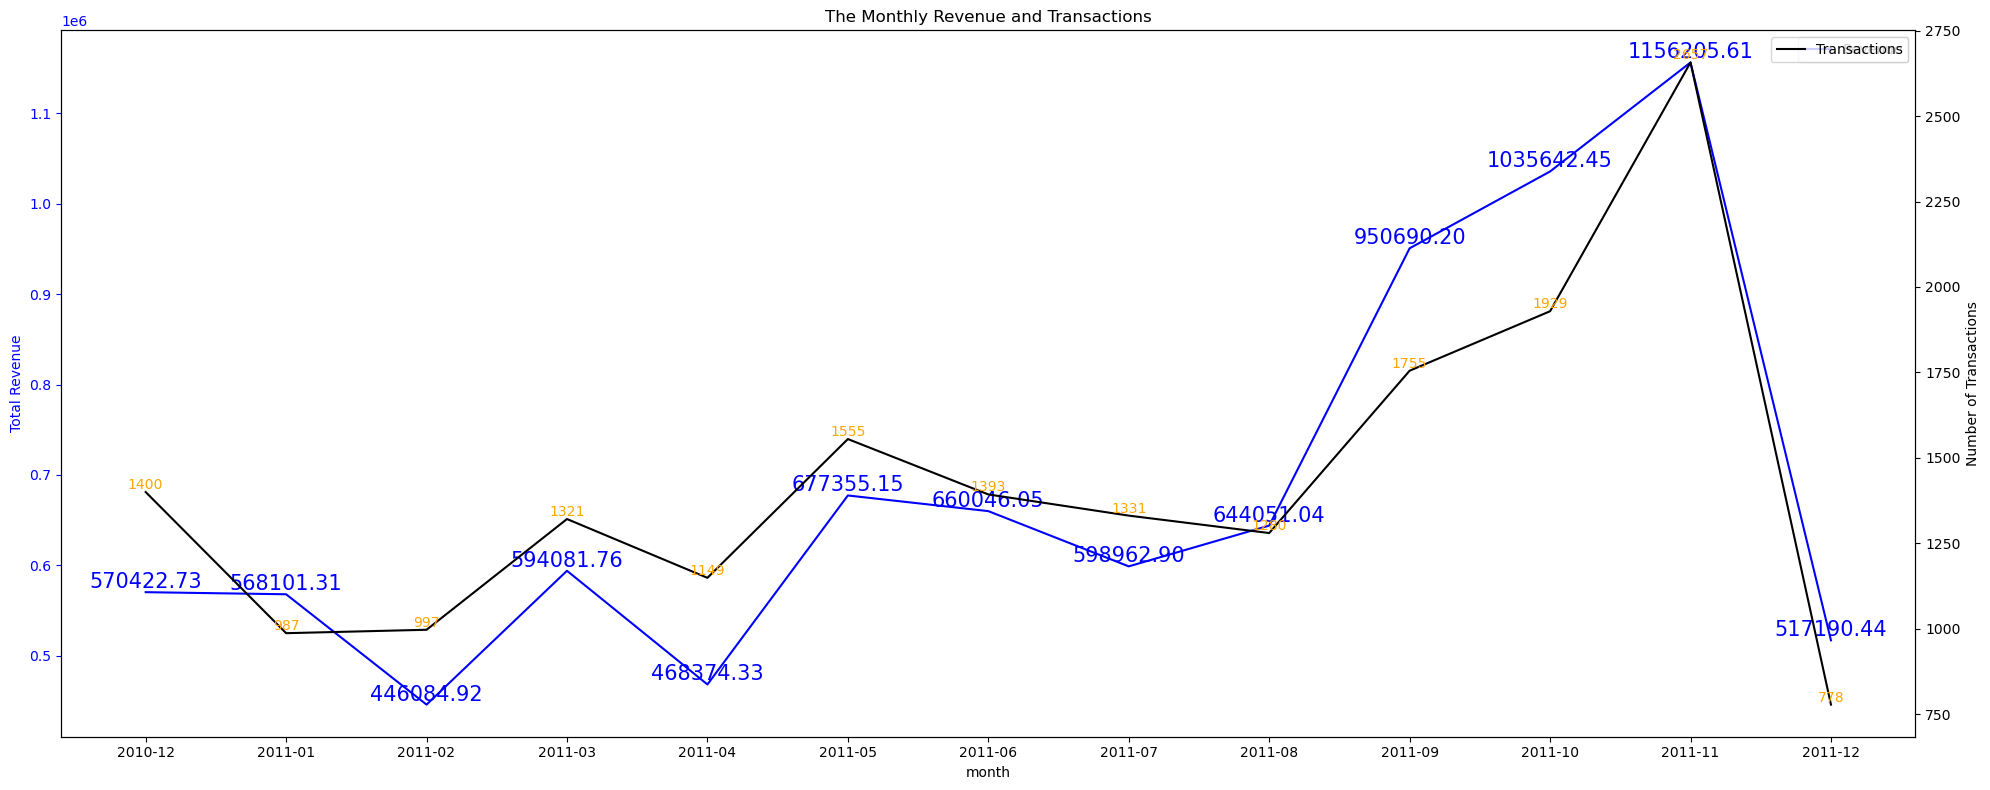

In [80]:

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month from the 'InvoiceDate' column
df['month'] = df['InvoiceDate'].dt.to_period('M')

# Summarize data by month
monthly_summary = df.groupby('month').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique'  # Unique invoice numbers as number of transactions
}).rename(columns={'InvoiceNo': 'num_transactions'})

# Plot monthly trends
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()

# Plot Revenue with point labels
sns.lineplot(
    data=monthly_summary, 
    x=monthly_summary.index.astype(str), 
    y='Revenue', 
    ax=ax1, 
    label='Revenue', 
    color='blue'
)
for x, y in zip(monthly_summary.index.astype(str), monthly_summary['Revenue']):
    ax1.text(x, y, f"{y:.2f}", color='blue', ha='center', va='bottom', fontsize=15)

# Plot Transactions with point labels
sns.lineplot(
    data=monthly_summary, 
    x=monthly_summary.index.astype(str), 
    y='num_transactions', 
    ax=ax2, 
    label='Transactions', 
    color='black'
)
for x, y in zip(monthly_summary.index.astype(str), monthly_summary['num_transactions']):
    ax2.text(x, y, f"{y:.0f}", color='orange', ha='center', va='bottom', fontsize=10)

# Customize plot appearance
ax1.set_title('The Monthly Revenue and Transactions')
ax1.set_ylabel('Total Revenue', color='blue')
ax2.set_ylabel('Number of Transactions', color='black')  #Number of Transaction plot is black                                                      
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This shows that there is high revenue and high number of transaction in November 2011 than other months                                                              

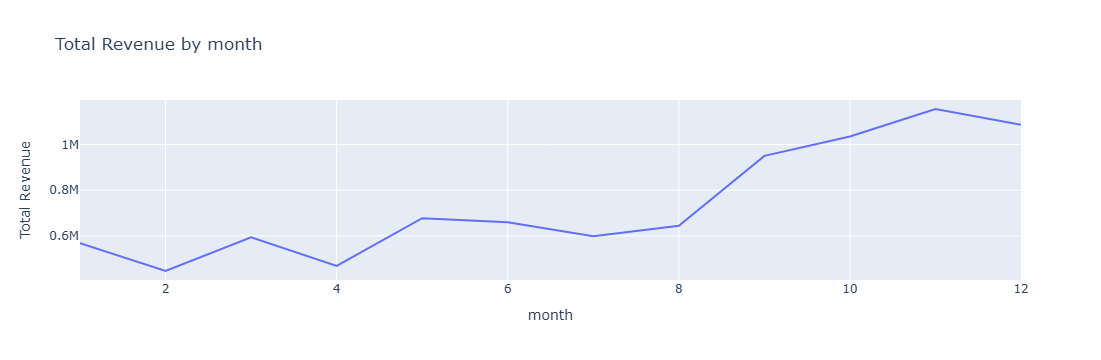

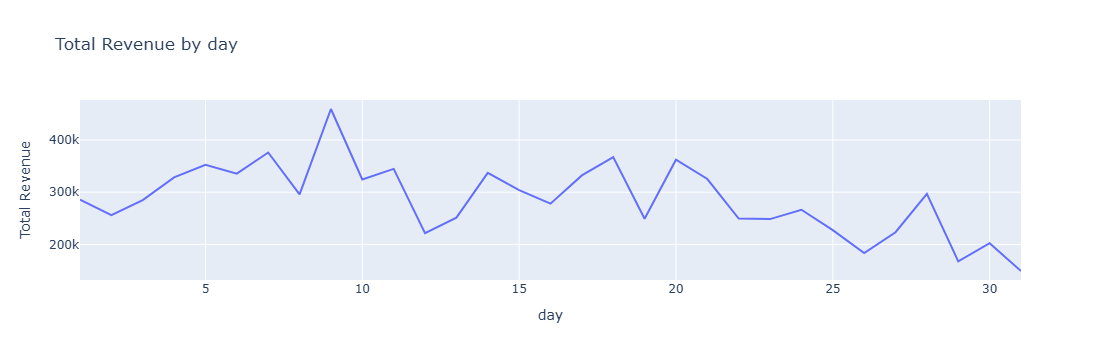

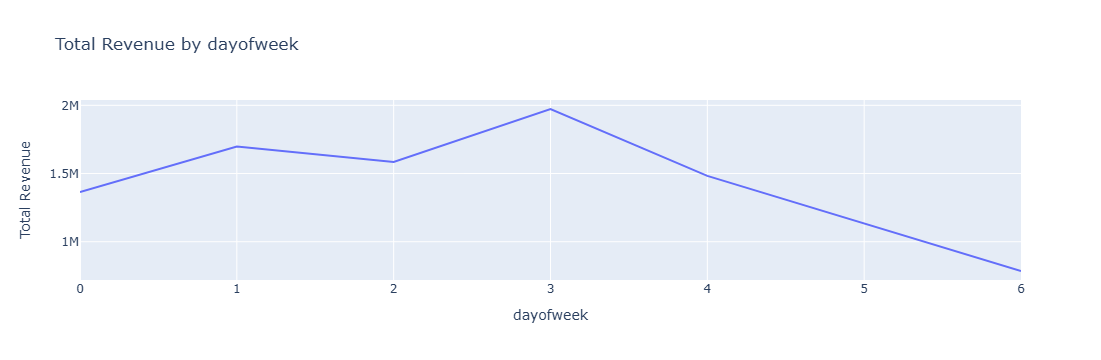

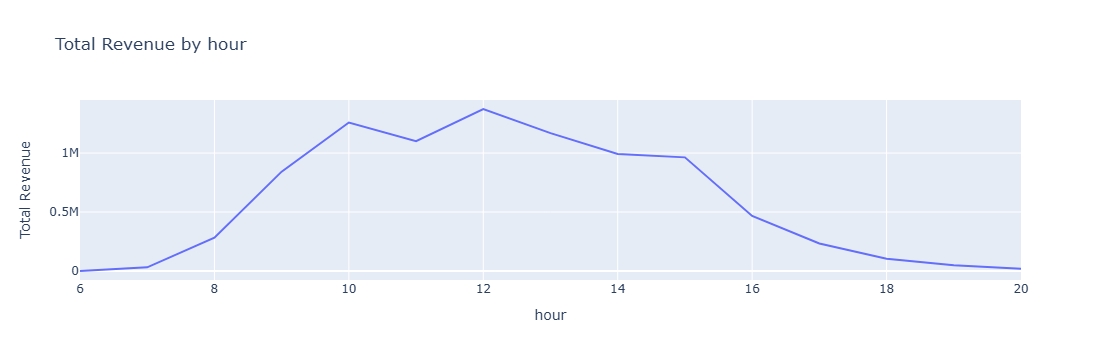

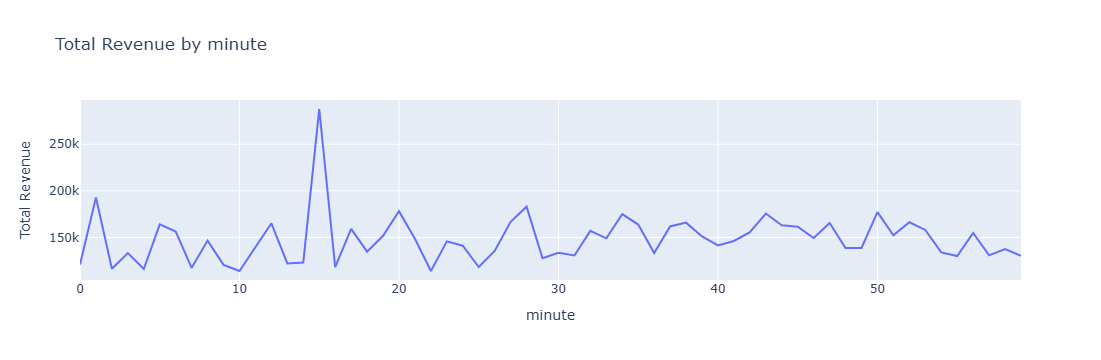

In [90]:
# CLear Exploratory statistics using Plotly on Revenue based on Month, 
exploratory_columns = ['month', 'day', 'dayofweek', 'hour', 'minute']

for column in exploratory_columns:
    temp = df.groupby(df['InvoiceDate'].dt.__getattribute__(column))['Revenue'].sum()
    fig = px.line(temp, x=temp.index, y='Revenue', title=f'Total Revenue by {column}')
    fig.update_layout(yaxis_title='Total Revenue', xaxis_title=column)
    fig.show()

<font size = "10"> Question 2: Top product categories by revenue and growth trends </font>


Top product categories by total Revenue:
                                      Revenue
Description                                  
PAPER CRAFT , LITTLE BIRDIE         168469.60
REGENCY CAKESTAND 3 TIER            142264.75
WHITE HANGING HEART T-LIGHT HOLDER  100547.45
JUMBO BAG RED RETROSPOT              85040.54
MEDIUM CERAMIC TOP STORAGE JAR       81416.73


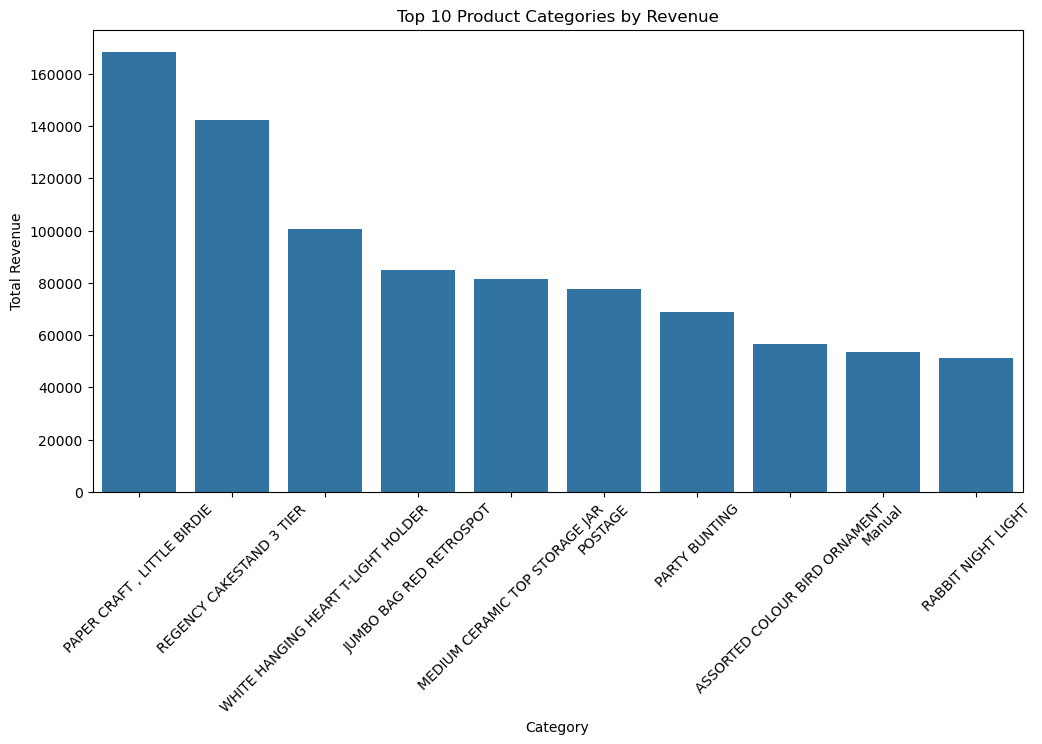

In [94]:

# Assuming 'Description' represents product categories
category_summary = df.groupby('Description').agg({
    'Revenue': 'sum'
}).sort_values('Revenue', ascending=False)

print("\nTop product categories by total Revenue:")
print(category_summary.head())

# Plot top categories using seaborn plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_summary.index[:10], y=category_summary['Revenue'][:10])
plt.xticks(rotation=45)
plt.title('Top 10 Product Categories by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.show()

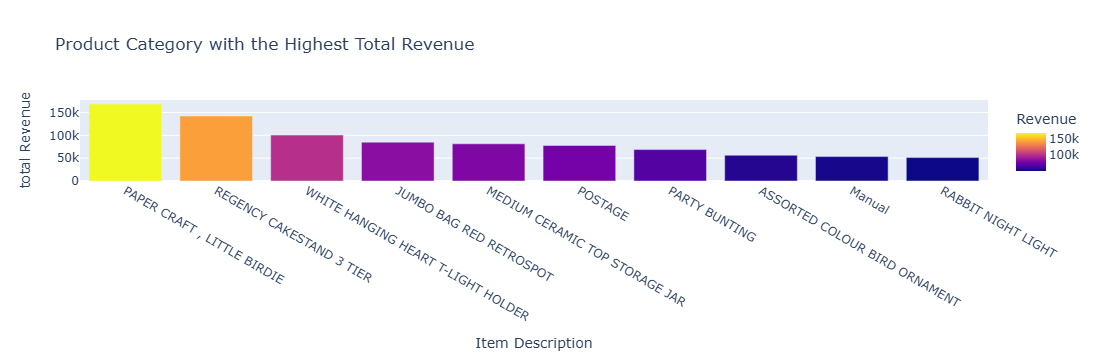

In [96]:
#Product categories with the highest total revenue # using Plotly bar plot
# Group by Product catergories and calculate total Revenue
most_items_revenue = df.groupby(['Description'])['Revenue'].sum().reset_index()
most_items_revenue = most_items_revenue.sort_values(by=["Revenue"], ascending=False)

 # using Plotly bar plot
fig = px.bar(most_items_revenue.head(10), x='Description', y='Revenue', color='Revenue', title="Product Category with the Highest Total Revenue",)
fig.update_xaxes(title="Item Description")
fig.update_yaxes(title="total Revenue")
fig.show()

<font size= "7"> QUestion 3: Seasonal variations in sales by category</font>


Top product categories by seasonal Revenue trend:
    month_num                          Description  Revenue
0           1        4 PURPLE FLOCK DINNER CANDLES     5.10
1           1           OVAL WALL MIRROR DIAMANTE    119.40
2           1      SET 2 TEA TOWELS I LOVE LONDON   1107.20
3           1               10 COLOUR SPACEBOY PEN   234.60
4           1           12 COLOURED PARTY BALLOONS    52.00
5           1            12 DAISY PEGS IN WOOD BOX   113.85
6           1            12 EGG HOUSE PAINTED WOOD   140.25
7           1     12 IVORY ROSE PEG PLACE SETTINGS    67.50
8           1      12 MESSAGE CARDS WITH ENVELOPES   127.05
9           1        12 PENCIL SMALL TUBE WOODLAND   105.30
10          1  12 PENCILS SMALL TUBE RED RETROSPOT   211.25
11          1          12 PENCILS SMALL TUBE SKULL   198.90
12          1            12 PENCILS TALL TUBE POSY    10.20
13          1   12 PENCILS TALL TUBE RED RETROSPOT    54.40
14          1          12 PENCILS TALL TUBE SKULL

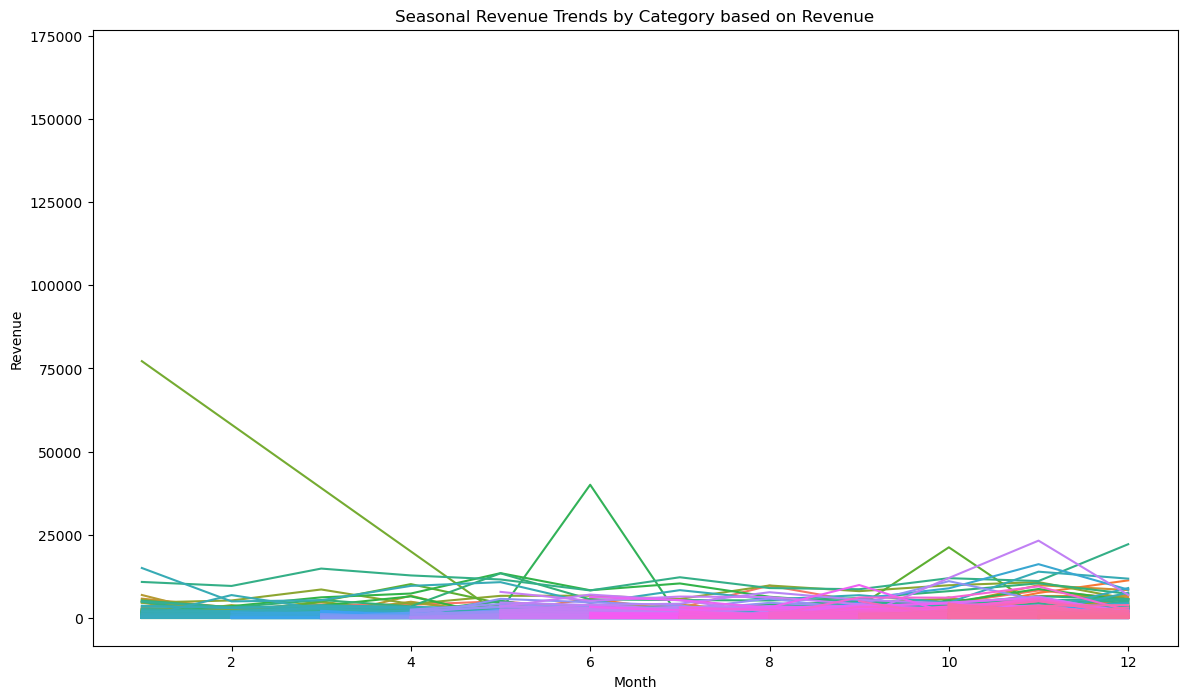

In [94]:
# Seasonal variations in sales by Product Category based on revenue
df['month_num'] = df['InvoiceDate'].dt.month
seasonal_summary = df.groupby(['month_num', 'Description']).agg({
    'Revenue': 'sum'
}).reset_index()

print("\nTop product categories by seasonal Revenue trend:")
print(seasonal_summary.head(20))

plt.figure(figsize=(14, 8))
sns.lineplot(data=seasonal_summary, x='month_num', y='Revenue', hue='Description', legend=False)
plt.title('Seasonal Revenue Trends by Category based on Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()


Product with the Highest Seasonal Variation:
MEDIUM CERAMIC TOP STORAGE JAR: 24585.02

Product with the Lowest Seasonal Variation:
NEW BAROQUE BLACK BOXES: 0.00


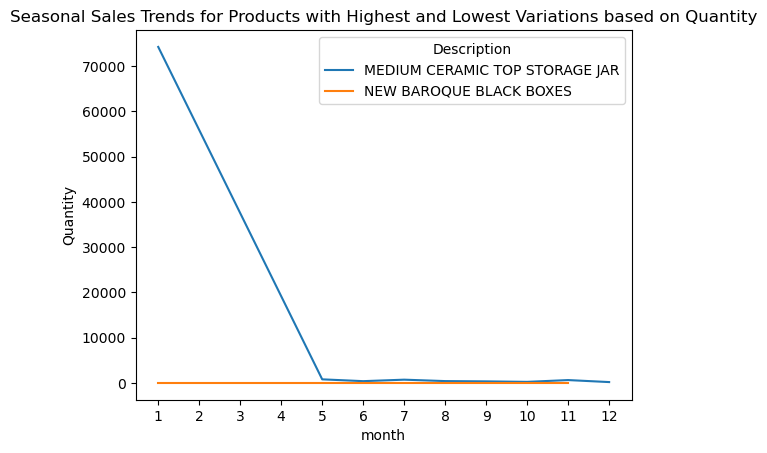

In [96]:
#seasonal variations in sales by product Category based on Quantity
# Group data by product category and month to explore seasonal variation
df['month'] = df['InvoiceDate'].dt.month
category_monthly_sales = df.groupby(['Description', 'month'])['Quantity'].sum().reset_index()

# Calculate the standard deviation of monthly sales for each product
category_variation = category_monthly_sales.groupby('Description')['Quantity'].std().reset_index()
category_variation.columns = ['Description', 'Seasonal_Variation']

# Identify the products with the highest and lowest seasonal variation
highest_variation_product = category_variation.sort_values(by='Seasonal_Variation', ascending=False).iloc[0]
lowest_variation_product = category_variation.sort_values(by='Seasonal_Variation', ascending=True).iloc[0]

# Display the results
print("Product with the Highest Seasonal Variation:")
print(f"{highest_variation_product['Description']}: {highest_variation_product['Seasonal_Variation']:.2f}")

print("\nProduct with the Lowest Seasonal Variation:")
print(f"{lowest_variation_product['Description']}: {lowest_variation_product['Seasonal_Variation']:.2f}")

# Visualization of seasonal variations for context (optional)
sns.lineplot(
    data=category_monthly_sales[category_monthly_sales['Description'].isin(
        [highest_variation_product['Description'], lowest_variation_product['Description']]
    )],
    x='month',
    y='Quantity',
    hue='Description'
).set(title='Seasonal Sales Trends for Products with Highest and Lowest Variations based on Quantity')
plt.xticks(range(1, 13))
plt.show()

<font size = "7"> Question 4: Customer purchasing behavior </font>


Customer purchasing behavior summary:
       num_transactions        Revenue
count       4338.000000    4338.000000
mean           4.272015    2048.559969
std            7.697998    8984.681710
min            1.000000       3.750000
25%            1.000000     306.482500
50%            2.000000     668.570000
75%            5.000000    1660.597500
max          209.000000  280206.020000


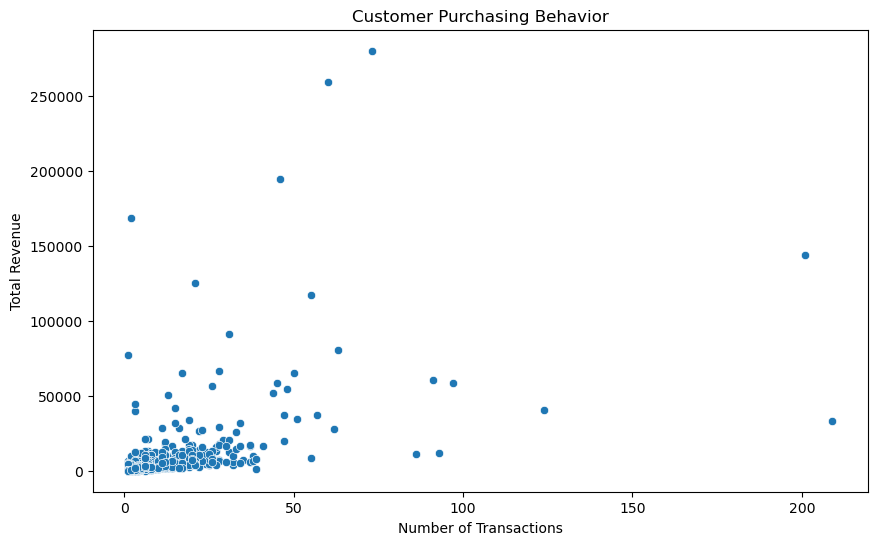

In [358]:

customer_behavior = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of transactions per customer
    'Revenue': 'sum'        # Total revenue per customer
}).rename(columns={'InvoiceNo': 'num_transactions'})

print("\nCustomer purchasing behavior summary:")
print(customer_behavior.describe())

# Plot revenue vs number of transactions per customer
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_behavior, x='num_transactions', y='Revenue')
plt.title('Customer Purchasing Behavior')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Revenue')
plt.show()


In [98]:
# Print total number of unique clients
print("Total number of clients:\n" + str(df["CustomerID"].nunique()))

Total number of clients:
4338


In [100]:
# Group by customer and calculate total quantity and revenue
customer_summary = df.groupby(['CustomerID'])[['Quantity', 'Revenue']].sum().reset_index()

# Sort customers by quantity and revenue
sorted_by_quantity = customer_summary.sort_values(by=["Quantity"], ascending=False)
sorted_by_revenue = customer_summary.sort_values(by=["Revenue"], ascending=False)

# Select top customers by quantity and revenue
top_customers_by_quantity = sorted_by_quantity.head(10)
top_customers_by_revenue = sorted_by_revenue.head(10)

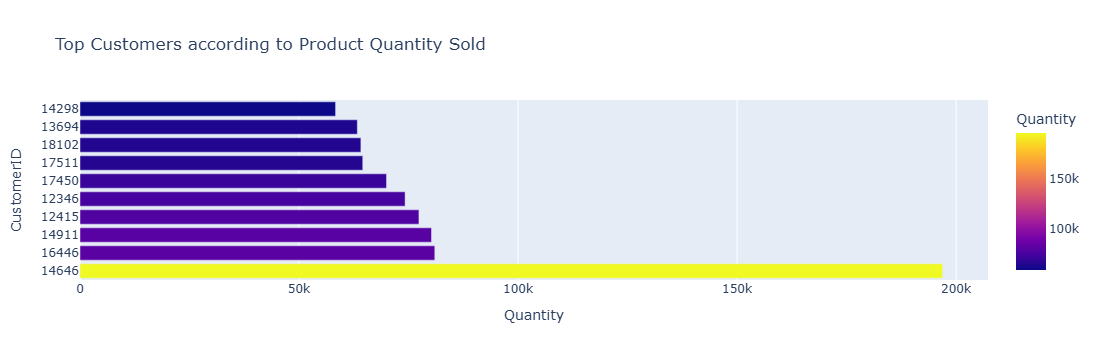

In [102]:
# Horizontal bar plot for top customers by quantity
fig_quantity = px.bar(top_customers_by_quantity, x="Quantity", y="CustomerID", color="Quantity", orientation='h', title="Top Customers according to Product Quantity Sold")
fig_quantity.update_xaxes(title="Quantity")
fig_quantity.update_yaxes(title="CustomerID", type = 'category')
fig_quantity.show()

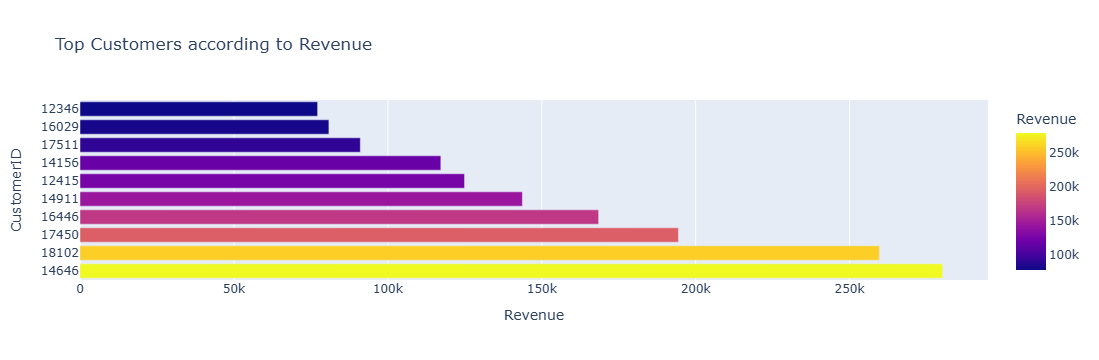

In [104]:
# Horizontal bar plot for top customers by revenue
fig_revenue = px.bar(top_customers_by_revenue, x="Revenue", y="CustomerID", color="Revenue", orientation='h', title="Top Customers according to Revenue")
fig_revenue.update_xaxes(title="Revenue")
fig_revenue.update_yaxes(title="CustomerID", type = 'category')
fig_revenue.show()